In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import dynamics_params as dp
from scipy import integrate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
%%time
A=np.array([[1,2,5,4],[1,10,20,30],[100,200,300,400],[10,20,30,40]])
A.shape,np.gradient(A)[1]
np.gradient(A,axis=-1),np,gradient(A)[1]
integrate.trapz(A, np.arange(1,5), axis=-1)

CPU times: user 458 µs, sys: 123 µs, total: 581 µs
Wall time: 501 µs


array([  9.5,  45.5, 750. ,  75. ])

## read U and V

(13514, 73, 144)
CPU times: user 9.96 s, sys: 6min 59s, total: 7min 9s
Wall time: 7min 14s


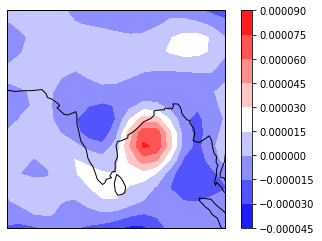

In [8]:
%%time
uname='anomalies/u850.1982-2018.nc'
vname='anomalies/v850.1982-2018.nc'
sellevel =850
A1  = dp.hvorticity_xarray(uname,vname,sellevel=850,uvarname='uwnd',vvarname='vwnd')
AA = A1.sel(lat=slice(0,40),lon=slice(60,100),time="2014-10-11") ## cyclone Hudhud
ax = plt.axes(projection=ccrs.PlateCarree())
a=ax.contourf(AA.lon,AA.lat,AA["VOR"],transform=ccrs.PlateCarree(),cmap="bwr")
ax.coastlines()
plt.colorbar(a,ax=ax)


In [123]:
# %%time
# uname='anomalies/u.anomalies.nc'
# vname='anomalies/v.anomalies.nc'
# A = A1.sel(lat=slice(0,40),lon=slice(60,100),time="2014-10-11")
# ax = plt.axes(projection=ccrs.PlateCarree())
# a=ax.contourf(AA.lon,AA.lat,AA.sel(level=200)["VOR"],transform=ccrs.PlateCarree(),cmap="bwr")
# ax.coastlines()
# plt.colorbar(a,ax=ax)